# Bibliotecas

In [162]:
import pandas
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

# Base de Dados

In [131]:
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pandas.read_csv("Dados/adult.data", names=columns_name, index_col=False)

# Análise Exploratória de Dados

In [132]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tipos dos dados

In [133]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [134]:
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['class'] = df['class'].astype('category')
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

## Descrição dos dados

In [135]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Dados duplicados

In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


## Dados faltantes

In [140]:
for coluna in columns_name:
    print(coluna)
    print(len(df[df[coluna] == " ?"]))
    df.drop(index=df[df[coluna] == ' ?'].index, inplace=True)

age
0
workclass
1836
fnlwgt
0
education
0
education-num
0
marital-status
0
occupation
7
relationship
0
race
0
sex
0
capital-gain
0
capital-loss
0
hours-per-week
0
native-country
555
class
0


In [141]:
len(df)

30139

In [142]:
df.isnull().sum()/len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

## Outliers

<AxesSubplot:>

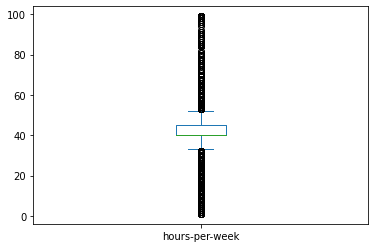

In [143]:
df['hours-per-week'].plot.box()

<AxesSubplot:>

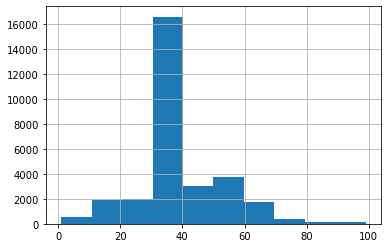

In [144]:
df['hours-per-week'].hist()

<AxesSubplot:>

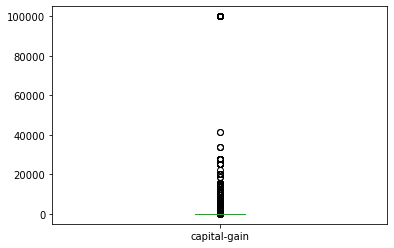

In [145]:
df['capital-gain'].plot.box()

<AxesSubplot:>

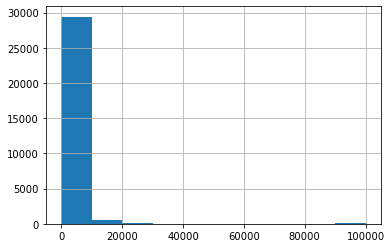

In [146]:
df['capital-gain'].hist()

<AxesSubplot:>

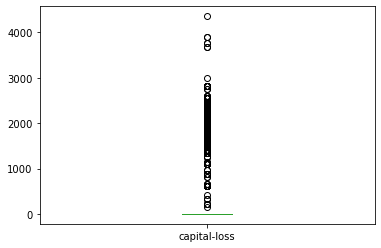

In [147]:
df['capital-loss'].plot.box()

<AxesSubplot:>

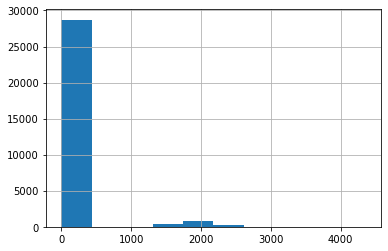

In [148]:
df['capital-loss'].hist()

In [149]:
#q1 = dados['idade_log'].quantile(q=0.25)
#q3 = dados['idade_log'].quantile(q=0.75)
#iqr = q3 - q1
#print(iqr)

## Value counts

In [150]:
df['workclass'].value_counts()

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 ?                       0
 Never-worked            0
Name: workclass, dtype: int64

In [151]:
df['education'].value_counts()

 HS-grad         9834
 Some-college    6669
 Bachelors       5042
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [152]:
df['marital-status'].value_counts()

 Married-civ-spouse       14059
 Never-married             9711
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [153]:
df['occupation'].value_counts()

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3719
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
 ?                       0
Name: occupation, dtype: int64

In [154]:
df['relationship'].value_counts()

 Husband           12457
 Not-in-family      7714
 Own-child          4462
 Unmarried          3211
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [155]:
df['race'].value_counts()

 White                 25912
 Black                  2816
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [156]:
df['sex'].value_counts()

 Male      20366
 Female     9773
Name: sex, dtype: int64

In [157]:
df['native-country'].value_counts()

 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [158]:
df['class'].value_counts()

 <=50K    22633
 >50K      7506
Name: class, dtype: int64

# Carregando base de dados

Devemos tratar base de teste? devemos remover as ?interrogações?

In [161]:
df_test = pandas.read_csv("Dados/adult.test", names=columns_name, index_col=False, skiprows=1)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [163]:
X_train = df.drop("class", axis = 1).to_numpy()
y_train = df["class"].values
X_test = df_test.drop("class", axis = 1).to_numpy()
y_test = df_test["class"].values

# Codificando e normalizando

- Como devemos tratar os dados? Pq temos variaveis continuas e categoricas
- E como tratar de forma igual o train e test? Pode ocorrer erro na hora de codificar as variaveis categoricas
- como codificar as variaveis categoricas? fazer one hot encoding?

In [165]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [170]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED, stratify=y)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = SEED, stratify=y_train)
X_train = preprocessing.minmax_scale(X_train)
X_test = preprocessing.minmax_scale(X_test)
#X_valid = preprocessing.minmax_scale(X_valid)

ValueError: could not convert string to float: ' State-gov'

# KNN (Livy)

# Árvore de decisão simples (Priscilla)

# Random Forest (Lucas)

# Rede neural MLP (Mari)

# Comitê de Redes Neurais (Laianna)